In [72]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.special import genlaguerre as L

The Laguerre polynomial $L_n^\alpha(x)$ is called with L(n, $\alpha$)(x)

In [73]:
wavelength = 1.0      #laser wavelength
k = 1.0/wavelength
mass = 1.0               #harm osc mass
omega = 1.0           #harm osc freq. 
hbar = sp.constants.hbar
eta = k*np.sqrt(hbar/(2.0*mass*omega)) #Lamb-Dicke parameter

The following function returns the inner product given in Eqn 3.11 of Roos' Thesis which is proportianal to the Rabi rate between the nth and (n+m)th energy levels.

In [74]:
def Omega(n,m,eta):
    return np.exp(-eta**2/2.0) * eta**(np.abs(m)) * (math.factorial(n)/math.factorial(n+m))**(np.sign(m)/2) \
        * L(n,np.abs(m))(eta**2)

In [4]:
npoints = 801
eta = 0.05
N = np.arange(1,npoints,1)
carriers  = [0]*(npoints-1)
side1 = [0]*(npoints-1)
side2 = [0]*(npoints-1)
for ii in range(npoints-1):
    carriers[ii] = Omega(N[ii],0,eta)
    side1[ii] = Omega(N[ii],1,eta)
    side2[ii] = Omega(N[ii],2,eta)

D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:651: RuntimeWarning: invalid value encountered in double_scalars
  hn = _gam(n + alpha + 1) / _gam(n + 1)
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:196: RuntimeWarning: overflow encountered in true_divide
  w = 1.0 / (fm * dy)
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:202: RuntimeWarning: invalid value encountered in multiply
  w *= mu0 / w.sum()
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:127: RuntimeWarning: invalid value encountered in double_scalars
  equiv_weights = [weights[k] / wfunc(roots[k]) for
D:\Mark\Python\lib\site-packages\scipy\special\_orthogonal.py:196: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / (fm * dy)
D:\Mark\Python\lib\site-packages\scipy\special\_or

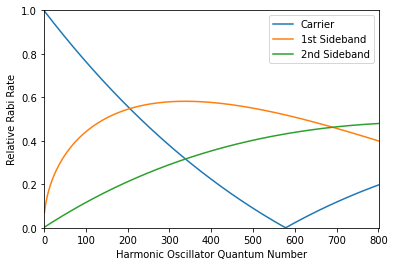

In [5]:
plt.plot(N,np.abs(carriers), label="Carrier")
plt.plot(N,side1, label="1st Sideband")
plt.plot(N,side2, label="2nd Sideband")
plt.xlabel('Harmonic Oscillator Quantum Number')
plt.ylabel('Relative Rabi Rate')
plt.xlim(0,801)
plt.ylim(0,1)
plt.legend()
plt.show()

Now to get the thermal distribution. I'm gonna use the probability of finding the system in the harm. osc. state n is given by $P(n) = \frac{1}{\bar{n}+1}\left(\frac{\bar{n}}{\bar{n}+1}\right)^n$

In [77]:
k = sp.constants.Boltzmann
T = 0.0001
omega = 2.0*np.pi*778.0e3       #secular motion frequency from pg 10 of PTB booklet 

Ncut = 100
nbar = 10

In [75]:
def prob(n,nbar):
    return 1.0/(nbar+1)*(nbar/(nbar+1))**n

In [53]:
Ns = np.arange(0,1000,1)
probs = [0]*np.size(Ns)
for ii in range(np.size(Ns)):
    probs[ii] = prob(Ns[ii],nbar)

(0.0, 100.0)

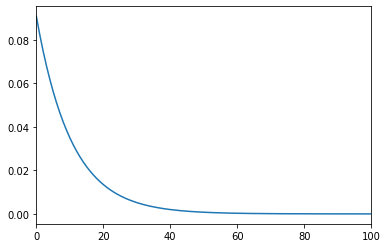

In [54]:
plt.plot(Ns,probs)
plt.xlim(0,100)

In [90]:
nbar = 10.0
Ncut = 200
eta = 0.1
ts = np.arange(0.0,25.0,0.2)
rhoDD = [0.0]*np.size(ts)
for ii in range(np.size(ts)):
    for n in range(Ncut+1):
        rhoDD[ii] += prob(n,nbar)*(np.sin(Omega(n,0,eta)*ts[ii]))**2

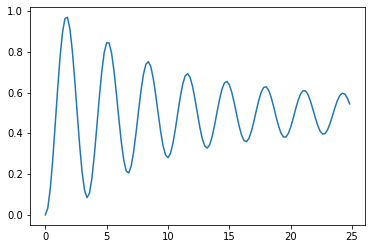

In [91]:
plt.plot(ts,rhoDD)